# GeoViT Evaluation Notebook

This notebook loads the model and runs statistical and semantic evaluation snippets.

In [23]:
loaded_model = "5e_10s_pretrained_3ab.pth"

For testing we use shard 0, which we dont include in training.

In [19]:
from data_loader import get_eval_data


config = {
    # Dataloader config
    "start_idx": 0,
    "num_shards": 1,
    "batch_size": 32,
    "workers": 0,
    "image_size": 224,
    # Training config
    "device": "cuda",
    "num_epochs": 20,
    "initial_lr": 1e-4,
    "model_name": loaded_model,
    "pin_memory": True
}

dataloader = get_eval_data(config, n=1000)

Eval dataset size: 1000


In [22]:
import torch.optim as optim

from model import ExtendedGeoViT
from utils import load_model

device = "cuda"
model  = ExtendedGeoViT()
no_decay = ["bias", "LayerNorm.weight"]

vit_parameters = model.vit.named_parameters()
added_block_parameters = model.additional_blocks.parameters()
final_classifier_parameters = model.final_classifier.parameters()

optimizer_grouped_parameters = [
    {
        "params": [
            p for n, p in vit_parameters if not any(nd in n for nd in no_decay)
        ],
        "lr": 1e-6,
        "weight_decay": 0.01,
    },
    {
        "params": [p for n, p in vit_parameters if any(nd in n for nd in no_decay)],
        "lr": 1e-6,
        "weight_decay": 0.0,
    },
    {
        "params": added_block_parameters,
        "lr": config["initial_lr"],
        "weight_decay": 0.01,
    },
    {
        "params": final_classifier_parameters,
        "lr": config["initial_lr"],
        "weight_decay": 0.0,
    },
]
optimizer = optim.Adam(optimizer_grouped_parameters)

# 5 Epochs
# 10 shards (out of 142)
# google feature extraction ViT weights
# 3 additional transformer blocks
model = load_model(model, optimizer, f"./{model}")


Some weights of the model checkpoint at google/vit-base-patch16-224 were not used when initializing ViTModel: ['classifier.weight', 'classifier.bias']
- This IS expected if you are initializing ViTModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing ViTModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of ViTModel were not initialized from the model checkpoint at google/vit-base-patch16-224 and are newly initialized: ['vit.pooler.dense.bias', 'vit.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


OSError: [Errno 22] Invalid argument: "./ExtendedGeoViT(\n  (vit): ViTModel(\n    (embeddings): ViTEmbeddings(\n      (patch_embeddings): ViTPatchEmbeddings(\n        (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))\n      )\n      (dropout): Dropout(p=0.0, inplace=False)\n    )\n    (encoder): ViTEncoder(\n      (layer): ModuleList(\n        (0-11): 12 x ViTLayer(\n          (attention): ViTAttention(\n            (attention): ViTSelfAttention(\n              (query): Linear(in_features=768, out_features=768, bias=True)\n              (key): Linear(in_features=768, out_features=768, bias=True)\n              (value): Linear(in_features=768, out_features=768, bias=True)\n              (dropout): Dropout(p=0.0, inplace=False)\n            )\n            (output): ViTSelfOutput(\n              (dense): Linear(in_features=768, out_features=768, bias=True)\n              (dropout): Dropout(p=0.0, inplace=False)\n            )\n          )\n          (intermediate): ViTIntermediate(\n            (dense): Linear(in_features=768, out_features=3072, bias=True)\n            (intermediate_act_fn): GELUActivation()\n          )\n          (output): ViTOutput(\n            (dense): Linear(in_features=3072, out_features=768, bias=True)\n            (dropout): Dropout(p=0.0, inplace=False)\n          )\n          (layernorm_before): LayerNorm((768,), eps=1e-12, elementwise_affine=True)\n          (layernorm_after): LayerNorm((768,), eps=1e-12, elementwise_affine=True)\n        )\n      )\n    )\n    (layernorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)\n    (pooler): ViTPooler(\n      (dense): Linear(in_features=768, out_features=768, bias=True)\n      (activation): Tanh()\n    )\n    (classifier): Identity()\n  )\n  (layer_norm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)\n  (dropout): Dropout(p=0.1, inplace=False)\n  (additional_blocks): ModuleList(\n    (0): Sequential(\n      (0): Linear(in_features=768, out_features=384, bias=True)\n      (1): GeoViTBlock(\n        (norm1): LayerNorm((384,), eps=1e-05, elementwise_affine=True)\n        (linear1): Linear(in_features=384, out_features=384, bias=True)\n        (mhsa): MSA(\n          (self_attention): MultiheadAttention(\n            (out_proj): NonDynamicallyQuantizableLinear(in_features=384, out_features=384, bias=True)\n          )\n        )\n        (norm2): LayerNorm((384,), eps=1e-05, elementwise_affine=True)\n        (mlp): Sequential(\n          (0): Linear(in_features=384, out_features=1536, bias=True)\n          (1): GELU(approximate='none')\n          (2): Linear(in_features=1536, out_features=384, bias=True)\n        )\n        (linear2): Linear(in_features=384, out_features=384, bias=True)\n      )\n    )\n    (1): Sequential(\n      (0): Linear(in_features=384, out_features=192, bias=True)\n      (1): GeoViTBlock(\n        (norm1): LayerNorm((192,), eps=1e-05, elementwise_affine=True)\n        (linear1): Linear(in_features=192, out_features=192, bias=True)\n        (mhsa): MSA(\n          (self_attention): MultiheadAttention(\n            (out_proj): NonDynamicallyQuantizableLinear(in_features=192, out_features=192, bias=True)\n          )\n        )\n        (norm2): LayerNorm((192,), eps=1e-05, elementwise_affine=True)\n        (mlp): Sequential(\n          (0): Linear(in_features=192, out_features=768, bias=True)\n          (1): GELU(approximate='none')\n          (2): Linear(in_features=768, out_features=192, bias=True)\n        )\n        (linear2): Linear(in_features=192, out_features=192, bias=True)\n      )\n    )\n    (2): Sequential(\n      (0): Linear(in_features=192, out_features=96, bias=True)\n      (1): GeoViTBlock(\n        (norm1): LayerNorm((96,), eps=1e-05, elementwise_affine=True)\n        (linear1): Linear(in_features=96, out_features=96, bias=True)\n        (mhsa): MSA(\n          (self_attention): MultiheadAttention(\n            (out_proj): NonDynamicallyQuantizableLinear(in_features=96, out_features=96, bias=True)\n          )\n        )\n        (norm2): LayerNorm((96,), eps=1e-05, elementwise_affine=True)\n        (mlp): Sequential(\n          (0): Linear(in_features=96, out_features=384, bias=True)\n          (1): GELU(approximate='none')\n          (2): Linear(in_features=384, out_features=96, bias=True)\n        )\n        (linear2): Linear(in_features=96, out_features=96, bias=True)\n      )\n    )\n  )\n  (final_classifier): Linear(in_features=96, out_features=2, bias=True)\n)"

In [14]:
import base64
import io
import numpy as np
import math
import random
import torch

from utils import denormalize_image, denormalize_coordinates


def test_predict(model, dataloader):
    model = model.to(device)  # ensure the model is on GPU
    model.eval()
    predictions = []
    actual_coords = []
    with torch.no_grad():
        for data in dataloader:
            inputs, coordinates = data["image"].to(device), data["coordinates"].to(
                device
            )
            outputs = model(inputs)
            predictions.extend(outputs.cpu().numpy())
            actual_coords.extend(coordinates.cpu().numpy())
    return np.array(predictions), np.array(actual_coords)


def encode_image(item):
    image = denormalize_image(item["image"].permute(1, 2, 0).numpy())
    pil_image = Image.fromarray((image * 255).astype(np.uint8))
    buffered = io.BytesIO()
    pil_image.save(buffered, format="PNG")
    return base64.b64encode(buffered.getvalue()).decode("utf-8")


def haversine_distance(point_a, point_b):
    R = 6371.0
    lat1, lon1, lat2, lon2 = map(math.radians, [*point_a, *point_b])
    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = (
        math.sin(dlat / 2) ** 2
        + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2) ** 2
    )
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    return R * c


def test_and_evaluate(model, dataloader):
    model.eval()
    model.to(device)
    total_preds = 0
    within_10k, within_5k, within_1k, within_500 = 0, 0, 0, 0
    random_within_10k, random_within_5k, random_within_1k, random_within_500 = (
        0,
        0,
        0,
        0,
    )

    with torch.no_grad():
        for data in dataloader:
            inputs, coordinates = data["image"].to(device), data["coordinates"].to(
                device
            )
            outputs = model(inputs)
            # Convert tensor to numpy after moving it back to CPU
            predictions = outputs.cpu().numpy()
            actual_coords = coordinates.cpu().numpy()

            for pred_coord, actual_coord in zip(predictions, actual_coords):
                # Calculate distance between original and predicted point
                dist = haversine_distance(
                    denormalize_coordinates(actual_coord),
                    denormalize_coordinates(pred_coord),
                )

                # Count the predictions within certain distances
                if dist <= 10000:
                    within_10k += 1
                    if dist <= 5000:
                        within_5k += 1
                        if dist <= 1000:
                            within_1k += 1
                            if dist <= 500:
                                within_500 += 1

                # Generate random predictions
                random_lat, random_lon = random.uniform(-90, 90), random.uniform(
                    -180, 180
                )
                random_dist = haversine_distance(actual_coord, [random_lat, random_lon])

                # Count the random predictions within certain distances
                if random_dist <= 10000:
                    random_within_10k += 1
                    if random_dist <= 5000:
                        random_within_5k += 1
                        if random_dist <= 1000:
                            random_within_1k += 1
                            if random_dist <= 500:
                                random_within_500 += 1
                total_preds += 1

    print("Model Predictions")
    print("Within 10,000km:", (within_10k / total_preds) * 100, "%")
    print("Within 5,000km:", (within_5k / total_preds) * 100, "%")
    print("Within 1,000km:", (within_1k / total_preds) * 100, "%")
    print("Within 500km:", (within_500 / total_preds) * 100, "%")

    print("Random Predictions")
    print("Within 10,000km:", (random_within_10k / total_preds) * 100, "%")
    print("Within 5,000km:", (random_within_5k / total_preds) * 100, "%")
    print("Within 1,000km:", (random_within_1k / total_preds) * 100, "%")
    print("Within 500km:", (random_within_500 / total_preds) * 100, "%")


# Call the function
test_and_evaluate(model, dataloader)

Model Predictions
Within 10,000km: 90.0 %
Within 5,000km: 63.366666666666674 %
Within 1,000km: 9.833333333333332 %
Within 500km: 3.0 %
Random Predictions
Within 10,000km: 50.0 %
Within 5,000km: 10.0 %
Within 1,000km: 0.4333333333333333 %
Within 500km: 0.06666666666666667 %


In [15]:
import base64
import folium
import io
import numpy as np
import math
from PIL import Image


def test_predict(model, dataloader):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = model.to(device)
    model.eval()
    predictions = []
    actual_coords = []
    with torch.no_grad():
        for data in dataloader:
            inputs, coordinates = data["image"].to("cuda"), data["coordinates"].to(
                "cuda"
            )
            outputs = model(inputs)
            predictions.extend(outputs.cpu().numpy())
            actual_coords.extend(coordinates.cpu().numpy())
    return np.array(predictions), np.array(actual_coords)


def encode_image(item):
    image = denormalize_image(item["image"].permute(1, 2, 0).numpy())
    pil_image = Image.fromarray((image * 255).astype(np.uint8))
    buffered = io.BytesIO()
    pil_image.save(buffered, format="PNG")
    return base64.b64encode(buffered.getvalue()).decode("utf-8")


def haversine_distance(point_a, point_b):
    R = 6371.0
    lat1, lon1, lat2, lon2 = map(math.radians, [*point_a, *point_b])
    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = (
        math.sin(dlat / 2) ** 2
        + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2) ** 2
    )
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    return R * c


def plot_images_and_locations(
    valloader, predicted_coords, actual_coords, num_samples=30
):
    # Select num_samples random items from the valloader
    random_indices = np.random.choice(
        len(valloader.dataset), num_samples, replace=False
    )

    # Create an empty map centered at the average location of the selected samples
    avg_lat = np.mean(
        [valloader.dataset[i]["coordinates"][0].item() for i in random_indices]
    )
    avg_lon = np.mean(
        [valloader.dataset[i]["coordinates"][1].item() for i in random_indices]
    )

    f = folium.Figure(width=1000, height=800)
    world_map = folium.Map(
        location=denormalize_coordinates([avg_lat, avg_lon]),
        zoom_start=1,
    ).add_to(f)

    # Plot the images and their locations on the world map
    for idx in random_indices:
        item = valloader.dataset[idx]
        actual_coord = denormalize_coordinates(actual_coords[idx])
        pred_coord = denormalize_coordinates(predicted_coords[idx])

        # Add a marker with a popup image for the actual location
        actual_marker = folium.Marker(
            location=actual_coord, icon=folium.Icon(color="blue")
        )
        folium.Popup(
            f"<h3>{actual_coord[0]:.5f}&deg;, {actual_coord[1]:.5f}&deg;</h3><img src='data:image/png;base64,{encode_image(item)}'/>",
            max_width=256,
        ).add_to(actual_marker)
        actual_marker.add_to(world_map)

        # Calculate distance between original and predicted point
        dist = haversine_distance(actual_coord, pred_coord)

        # Add a marker for the predicted location
        pred_marker = folium.Marker(location=pred_coord, icon=folium.Icon(color="red"))
        popup_html = """
            <table style="width:100%">
            <tr>
                <th>Original Coords</th>
                <td>[{actual_lat:.2f}&deg;, {actual_lon:.2f}&deg;]</td>
            </tr>
            <tr>
                <th>Predicted Coords</th>
                <td>[{pred_lat:.2f}&deg;, {pred_lon:.2f}&deg;]</td>
            </tr>
            <tr>
                <th>Distance</th>
                <td>{dist:.2f}Km</td>
            </tr>
            </table>
        """.format(
            actual_lat=float(actual_coord[0]),
            actual_lon=float(actual_coord[1]),
            pred_lat=float(pred_coord[0]),
            pred_lon=float(pred_coord[1]),
            dist=dist,
        )

        folium.Popup(popup_html, max_width=300).add_to(pred_marker)

        pred_marker.add_to(world_map)

        # Draw a line connecting the actual and predicted coordinates
        folium.PolyLine([actual_coord, pred_coord], color="gray", weight=1).add_to(
            world_map
        )

    # Display the world map
    return world_map

In [16]:
predicted_coords, actual_coords = test_predict(model, train_dataloader)
plot_images_and_locations(train_dataloader, predicted_coords, actual_coords, 100)

KeyboardInterrupt: 

In [ ]:
def plot_best_images_and_locations(
    valloader, predicted_coords, actual_coords, num_samples=30
):
    # Calculate all the distances
    distances = [
        haversine_distance(denormalize_coordinates(actual_coords[i]), denormalize_coordinates(predicted_coords[i]))
        for i in range(len(valloader.dataset))
    ]

    # Get the indices of the num_samples smallest distances
    best_indices = np.argsort(distances)[:num_samples]

    # Create an empty map centered at the average location of the selected samples
    avg_lat = np.mean(
        [valloader.dataset[i]["coordinates"][0].item() for i in best_indices]
    )
    avg_lon = np.mean(
        [valloader.dataset[i]["coordinates"][1].item() for i in best_indices]
    )

    f = folium.Figure(width=1000, height=800)
    world_map = folium.Map(
        location=denormalize_coordinates([avg_lat, avg_lon]),
        zoom_start=1,
    ).add_to(f)

    # Plot the images and their locations on the world map
    for idx in best_indices:
        item = valloader.dataset[idx]
        actual_coord = denormalize_coordinates(actual_coords[idx])
        pred_coord = denormalize_coordinates(predicted_coords[idx])

        # Add a marker with a popup image for the actual location
        actual_marker = folium.Marker(
            location=actual_coord, icon=folium.Icon(color="blue")
        )
        folium.Popup(
            f"<h3>{actual_coord[0]:.5f}&deg;, {actual_coord[1]:.5f}&deg;</h3><img src='data:image/png;base64,{encode_image(item)}'/>",
            max_width=256,
        ).add_to(actual_marker)
        actual_marker.add_to(world_map)

        # Calculate distance between original and predicted point
        dist = haversine_distance(actual_coord, pred_coord)

        # Add a marker for the predicted location
        pred_marker = folium.Marker(location=pred_coord, icon=folium.Icon(color="red"))
        popup_html = """
            <table style="width:100%">
            <tr>
                <th>Original Coords</th>
                <td>[{actual_lat:.2f}&deg;, {actual_lon:.2f}&deg;]</td>
            </tr>
            <tr>
                <th>Predicted Coords</th>
                <td>[{pred_lat:.2f}&deg;, {pred_lon:.2f}&deg;]</td>
            </tr>
            <tr>
                <th>Distance</th>
                <td>{dist:.2f}Km</td>
            </tr>
            </table>
        """.format(
            actual_lat=float(actual_coord[0]),
            actual_lon=float(actual_coord[1]),
            pred_lat=float(pred_coord[0]),
            pred_lon=float(pred_coord[1]),
            dist=dist,
        )

        folium.Popup(popup_html, max_width=300).add_to(pred_marker)

        pred_marker.add_to(world_map)

        # Draw a line connecting the actual and predicted coordinates
        folium.PolyLine([actual_coord, pred_coord], color="gray", weight=1).add_to(
            world_map
        )

    # Display the world map
    return world_map


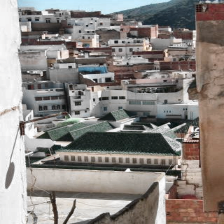
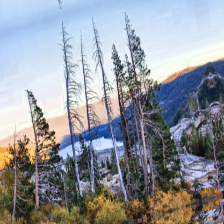
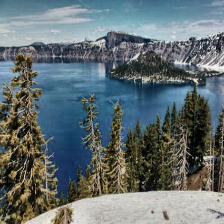
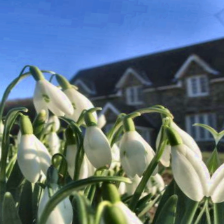
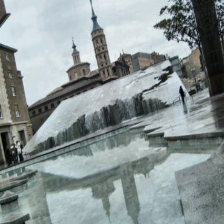
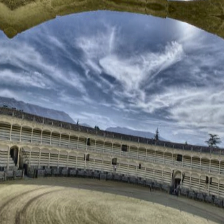
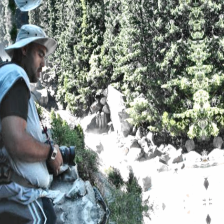
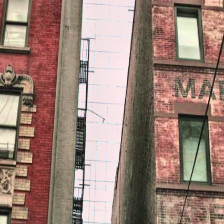
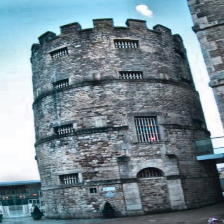
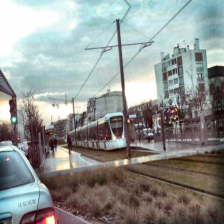
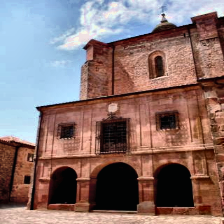
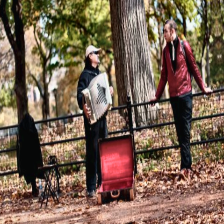
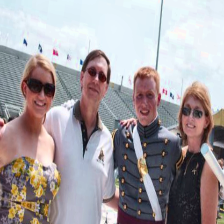
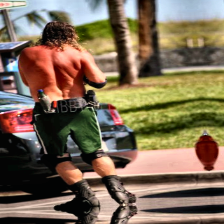
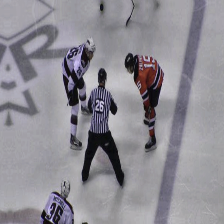
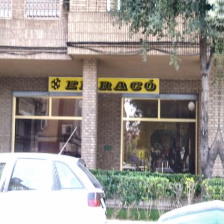
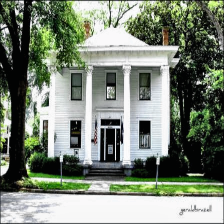
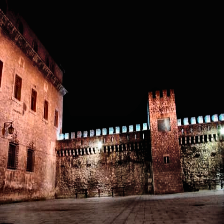
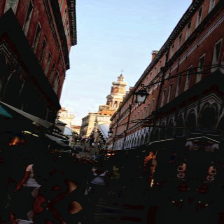
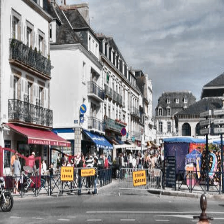

In [8]:
plot_best_images_and_locations(train_dataloader, predicted_coords, actual_coords, 20)